In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
work_dir = r"D:\Projects\Google Play Store"

In [6]:
app_data = pd.read_csv(os.path.join(work_dir, 'googleplaystore.csv'))

In [7]:
app_reviews = pd.read_csv(os.path.join(work_dir, 'googleplaystore_user_reviews.csv'))

In [8]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
app_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [12]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [21]:
apps_from_data = set(app_data.App.unique())

In [22]:
apps_from_review = set(app_reviews.App.unique())

In [25]:
len(apps_from_data.intersection(apps_from_review))

1020

In [27]:
len(app_reviews.App.unique())

1074

# Two types of Analysis:

- Dataset with Apps Reviews
- Dataset without reviews

## Dataset without Reviews

In [38]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [39]:
app_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

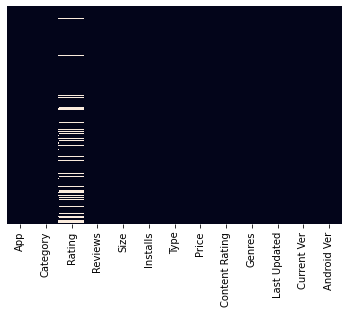

In [63]:
sns.heatmap(app_data.isnull(), cbar=False, yticklabels=False)

3 approches can be applied
- Removing all values
- Statistical method: Mean, median, mode
- Creating seperate model for handling these values (much more time)

In [53]:
per_missing = (app_data.isnull().sum()/app_data.count())*100

In [54]:
per_missing

App                0.000000
Category           0.000000
Rating            15.736095
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.009225
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073848
Android Ver        0.027680
dtype: float64

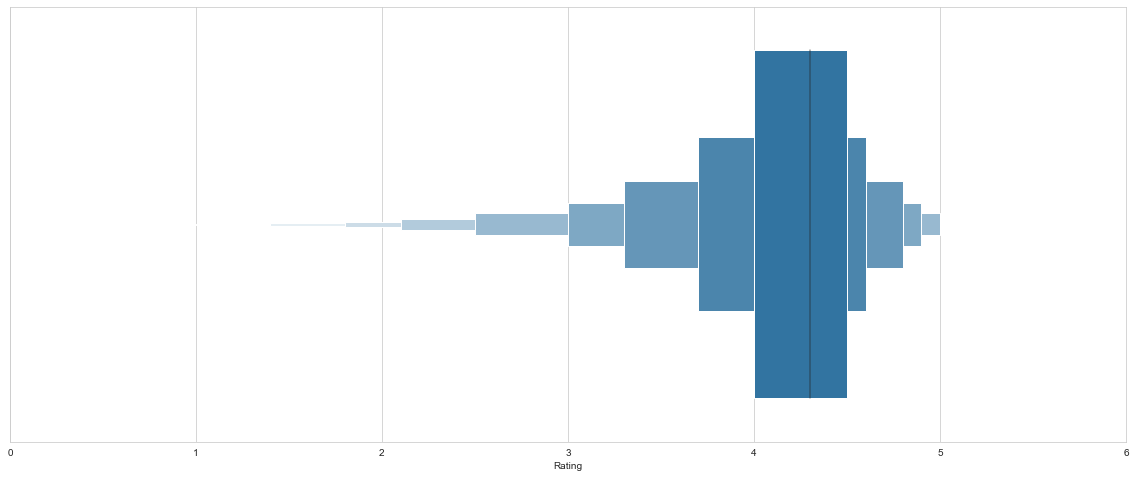

In [117]:
plt.figure(figsize=(20,8))
plt.xlim(0,6)
sns.set_style('whitegrid')
sns.boxenplot(x='Rating', data=app_data, hue='Type')

In [118]:
from sklearn.impute import SimpleImputer

In [119]:
imputed = SimpleImputer(missing_values=np.nan, strategy='mean')

array([4.1, 3.9, 4.7, ..., nan, 4.5, 4.5])

In [124]:
imputed.fit(app_data.Rating.values.reshape(-1,1))

SimpleImputer()

In [125]:
imputed.transform(app_data.Rating.values.reshape(-1,1))

array([[4.1       ],
       [3.9       ],
       [4.7       ],
       ...,
       [4.19333832],
       [4.5       ],
       [4.5       ]])

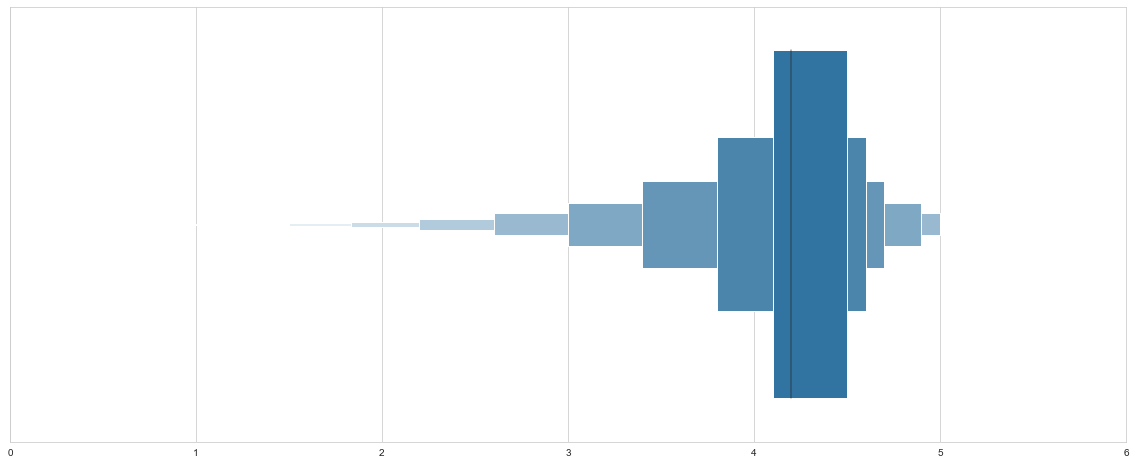

In [126]:
plt.figure(figsize=(20,8))
plt.xlim(0,6)
sns.set_style('whitegrid')
sns.boxenplot(x=imputed.transform(app_data.Rating.values.reshape(-1,1)), data=app_data, hue='Type')